In [398]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

Machine Amrta

In [399]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [400]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [401]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


# Construction du Y 

In [402]:
def nb_buts(x,data):
    tab =data.values
    for i in tab:
        if i[10]>x:
            i[24] = 1
        else:
             i[24] = 0
    a = tab[:,24]
    return a.astype(int)

## MODELE 1 :Y pour buts >0,5

In [403]:
a=nb_buts(0.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,1
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2018-05-19,Villarreal,Real Madrid,0.0,0,2.0,2.0,0.0,2.0,2.0,...,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862,6451,15239,1
376,2018-05-20,Ath Bilbao,Espanol,2.0,1,0.0,1.0,0.0,1.0,1.0,...,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085,4273,5802,1
377,2018-05-20,Ath Madrid,Eibar,0.0,0,2.0,2.0,1.0,1.0,2.0,...,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212,13709,4725,1
378,2018-05-20,Barcelona,Sociedad,1.0,2,1.0,0.0,0.0,0.0,0.0,...,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212,14840,4571,1


In [404]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,279509,AS Roma,Udinese Calcio,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,274443,CD Santa Clara,CS Marítimo,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,273894,Club Atlético de Madrid,RCD Mallorca,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,279520,SS Lazio,AC Milan,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,279526,US Sassuolo Calcio,US Lecce,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [405]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [406]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9251, 6) (9251,)
2


array([1, 1, 1, ..., 0, 1, 1])

In [407]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [408]:
model_zero_cinq = create_model()
print(model_zero_cinq.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_288 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_289 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_290 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_291 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_292 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_293 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_294 (Dense)            (None, 128)             

In [409]:
save_zero_cinq = ModelCheckpoint('model_buts_0,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [410]:
history = model_zero_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_zero_cinq])

Train on 9251 samples, validate on 2313 samples
Epoch 1/50
9180/9251 [============================>.] - ETA: 0s - loss: 8.2451 - accuracy: 0.8668
Epoch 00001: val_accuracy improved from -inf to 0.78383, saving model to model_buts_0,5.h5
9251/9251 [==============================] - 3s 313us/sample - loss: 8.1867 - accuracy: 0.8670 - val_loss: 0.5103 - val_accuracy: 0.7838
Epoch 2/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.3982 - accuracy: 0.9168
Epoch 00002: val_accuracy improved from 0.78383 to 0.92780, saving model to model_buts_0,5.h5
9251/9251 [==============================] - 2s 203us/sample - loss: 0.3960 - accuracy: 0.9172 - val_loss: 0.3171 - val_accuracy: 0.9278
Epoch 3/50
9000/9251 [============================>.] - ETA: 0s - loss: 0.2782 - accuracy: 0.9253
Epoch 00003: val_accuracy did not improve from 0.92780
9251/9251 [==============================] - 2s 205us/sample - loss: 0.2797 - accuracy: 0.9247 - val_loss: 0.2859 - val_accuracy: 0.9252
Epoch 4

Epoch 00028: val_accuracy did not improve from 0.92780
9251/9251 [==============================] - 2s 185us/sample - loss: 0.2702 - accuracy: 0.9247 - val_loss: 0.2595 - val_accuracy: 0.9278
Epoch 29/50
9090/9251 [============================>.] - ETA: 0s - loss: 0.2689 - accuracy: 0.9250
Epoch 00029: val_accuracy did not improve from 0.92780
9251/9251 [==============================] - 2s 169us/sample - loss: 0.2697 - accuracy: 0.9247 - val_loss: 0.2602 - val_accuracy: 0.9278
Epoch 30/50
9090/9251 [============================>.] - ETA: 0s - loss: 0.2675 - accuracy: 0.9250
Epoch 00030: val_accuracy did not improve from 0.92780
9251/9251 [==============================] - 2s 162us/sample - loss: 0.2683 - accuracy: 0.9247 - val_loss: 0.2589 - val_accuracy: 0.9278
Epoch 31/50
9090/9251 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.9242
Epoch 00031: val_accuracy did not improve from 0.92780
9251/9251 [==============================] - 2s 180us/sample - loss: 0.2

Text(0, 0.5, 'Accuracy')

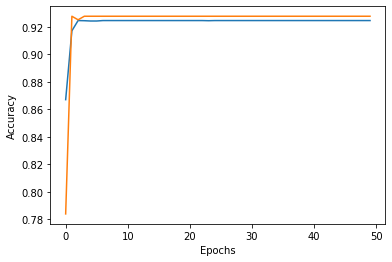

In [411]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prediction y > 0.5

In [412]:
unique = x_prediction.values
results = []
superieurzero =[]
inferieurzero = []
i = 0
predictions_final = model_zero_cinq.predict(np.array([x_train[1]]))
predictions_final

array([[0.08867537, 0.9113246 ]], dtype=float32)

In [413]:
model_zero_cinq.load_weights("model_buts_0,5.h5")

In [414]:
for i in unique:
    predictions_final = model_zero_cinq.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieurzero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieurzero.append(pred1)


In [415]:
superieurzero = np.round(superieurzero,2)
inferieurzero = np.round(inferieurzero,2)

In [416]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité_inf_0,5_buts':inferieurzero,'probabilité_sup_0,5_buts':superieurzero}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"probabilité_inf_0,5_buts","probabilité_sup_0,5_buts"
1429,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,0.99,0.01
1984,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.95,0.05
1090,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,1.00,0.00
1432,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.99,0.01
1431,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,0.94,0.06
...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.98,0.02
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.95,0.05
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.95,0.05
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.86,0.14


In [417]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_0,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_0,5.json')

## MODELE 2 :Y pour buts > 1,5

In [418]:
a=nb_buts(1.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2018-05-19,Villarreal,Real Madrid,0.0,0,2.0,2.0,0.0,2.0,2.0,...,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862,6451,15239,1
376,2018-05-20,Ath Bilbao,Espanol,2.0,1,0.0,1.0,0.0,1.0,1.0,...,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085,4273,5802,0
377,2018-05-20,Ath Madrid,Eibar,0.0,0,2.0,2.0,1.0,1.0,2.0,...,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212,13709,4725,1
378,2018-05-20,Barcelona,Sociedad,1.0,2,1.0,0.0,0.0,0.0,0.0,...,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212,14840,4571,0


In [419]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [420]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,279509,AS Roma,Udinese Calcio,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,274443,CD Santa Clara,CS Marítimo,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,273894,Club Atlético de Madrid,RCD Mallorca,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,279520,SS Lazio,AC Milan,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,279526,US Sassuolo Calcio,US Lecce,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [421]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9251, 6) (9251,)
2


array([1, 1, 1, ..., 1, 1, 1])

In [422]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [423]:
model_un_cinq = create_model()
print(model_un_cinq.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_304 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_305 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_306 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_307 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_308 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_309 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_310 (Dense)            (None, 128)             

In [424]:
save_un_cinq = ModelCheckpoint('model_buts_1,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [425]:
history = model_un_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_un_cinq])

Train on 9251 samples, validate on 2313 samples
Epoch 1/50
9000/9251 [============================>.] - ETA: 0s - loss: 6.1837 - accuracy: 0.6446
Epoch 00001: val_accuracy improved from -inf to 0.74449, saving model to model_buts_1,5.h5
9251/9251 [==============================] - 3s 305us/sample - loss: 6.0318 - accuracy: 0.6475 - val_loss: 0.6173 - val_accuracy: 0.7445
Epoch 2/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.6195 - accuracy: 0.7247
Epoch 00002: val_accuracy did not improve from 0.74449
9251/9251 [==============================] - 2s 191us/sample - loss: 0.6201 - accuracy: 0.7245 - val_loss: 0.5986 - val_accuracy: 0.7445
Epoch 3/50
8910/9251 [===========================>..] - ETA: 0s - loss: 0.5876 - accuracy: 0.7357
Epoch 00003: val_accuracy did not improve from 0.74449
9251/9251 [==============================] - 2s 188us/sample - loss: 0.5885 - accuracy: 0.7353 - val_loss: 0.6160 - val_accuracy: 0.7173
Epoch 4/50
9090/9251 [========================

Epoch 29/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.5669 - accuracy: 0.7422
Epoch 00029: val_accuracy did not improve from 0.74449
9251/9251 [==============================] - 2s 175us/sample - loss: 0.5663 - accuracy: 0.7426 - val_loss: 0.5672 - val_accuracy: 0.7445
Epoch 30/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.5690 - accuracy: 0.7420
Epoch 00030: val_accuracy did not improve from 0.74449
9251/9251 [==============================] - 2s 175us/sample - loss: 0.5686 - accuracy: 0.7426 - val_loss: 0.5630 - val_accuracy: 0.7445
Epoch 31/50
9000/9251 [============================>.] - ETA: 0s - loss: 0.5647 - accuracy: 0.7443
Epoch 00031: val_accuracy did not improve from 0.74449
9251/9251 [==============================] - 2s 180us/sample - loss: 0.5665 - accuracy: 0.7426 - val_loss: 0.5714 - val_accuracy: 0.7445
Epoch 32/50
9000/9251 [============================>.] - ETA: 0s - loss: 0.5700 - accuracy: 0.7422
Epoch 00032: val_accuracy di

Text(0, 0.5, 'Accuracy')

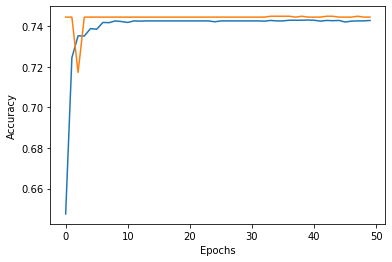

In [426]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prediction y > 1.5

In [427]:
unique = x_prediction.values
results = []
superieurun =[]
inferieurun = []
i = 0
predictions_final = model_un_cinq.predict(np.array([x_train[1]]))
predictions_final

array([[0.23378891, 0.7662111 ]], dtype=float32)

In [428]:
model_un_cinq.load_weights("model_buts_1,5.h5")

In [429]:
for i in unique:
    predictions_final = model_un_cinq.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieurun.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieurun.append(pred1)

In [430]:
superieurun = np.round(superieurun,2)
inferieurun = np.round(inferieurun,2)

In [431]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité_inf_1,5 buts':inferieurun,'probabilité_sup_1,5 buts':superieurun}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"probabilité_inf_1,5 buts","probabilité_sup_1,5 buts"
1429,2020-07-02,279509,FINISHED,100,115,AS Roma,Udinese Calcio,0.74,0.26
1984,2020-07-03,274443,FINISHED,5530,5575,CD Santa Clara,CS Marítimo,0.71,0.29
1090,2020-07-03,273894,FINISHED,78,89,Club Atlético de Madrid,RCD Mallorca,0.78,0.22
1432,2020-07-04,279520,FINISHED,110,98,SS Lazio,AC Milan,0.73,0.27
1431,2020-07-04,279526,FINISHED,471,5890,US Sassuolo Calcio,US Lecce,0.71,0.29
...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.73,0.27
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.71,0.29
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.71,0.29
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.70,0.30


In [432]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_1,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_1,5.json')

## MODELE 3 :Y pour buts > 2,5

In [433]:
a=nb_buts(2.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,0
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2018-05-19,Villarreal,Real Madrid,0.0,0,2.0,2.0,0.0,2.0,2.0,...,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862,6451,15239,1
376,2018-05-20,Ath Bilbao,Espanol,2.0,1,0.0,1.0,0.0,1.0,1.0,...,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085,4273,5802,0
377,2018-05-20,Ath Madrid,Eibar,0.0,0,2.0,2.0,1.0,1.0,2.0,...,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212,13709,4725,1
378,2018-05-20,Barcelona,Sociedad,1.0,2,1.0,0.0,0.0,0.0,0.0,...,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212,14840,4571,0


In [434]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1429,2020-07-02,FINISHED,279509,AS Roma,Udinese Calcio,100,115,6735,3100,1.892857,0.821429,1.357143,1.464286
1984,2020-07-03,FINISHED,274443,CD Santa Clara,CS Marítimo,5530,5575,3175,1672,1.000000,1.000000,1.206897,1.310345
1090,2020-07-03,FINISHED,273894,Club Atlético de Madrid,RCD Mallorca,78,89,9329,2475,1.341463,1.060606,0.969697,1.696970
1432,2020-07-04,FINISHED,279520,SS Lazio,AC Milan,110,98,6846,4490,2.275862,1.241379,0.965517,1.275862
1431,2020-07-04,FINISHED,279526,US Sassuolo Calcio,US Lecce,471,5890,3086,1781,1.758621,1.241379,1.724138,2.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1.972973,1.548387,1.161290,0.967742
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.935484,1.612903,1.193548,1.096774
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [435]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [436]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9251, 6) (9251,)
2


array([0, 1, 0, ..., 0, 0, 1])

In [437]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [438]:
# def create_model2():
    
#     model = Sequential()
    
#     model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
#     model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
#     model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    
#     model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
#     model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
#     model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    
#     model.add(BatchNormalization())
#     model.add(Dropout(0.05))
    
#     model.add(Dense(nbClasses, activation='softmax'))    
#     model.compile(loss="sparse_categorical_crossentropy",
#                   optimizer=Adam(),
#                   metrics=["accuracy"])
#     return model

In [439]:
model_deux_cinq= create_model()
print(model_deux_cinq.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_320 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_321 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_322 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_323 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_324 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_325 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_326 (Dense)            (None, 128)             

In [440]:
save_deux_cinq = ModelCheckpoint('model_buts_2,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [441]:
history = model_deux_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_deux_cinq])

Train on 9251 samples, validate on 2313 samples
Epoch 1/50
9180/9251 [============================>.] - ETA: 0s - loss: 8.4704 - accuracy: 0.5068
Epoch 00001: val_accuracy improved from -inf to 0.50281, saving model to model_buts_2,5.h5
9251/9251 [==============================] - 3s 300us/sample - loss: 8.4127 - accuracy: 0.5066 - val_loss: 0.7504 - val_accuracy: 0.5028
Epoch 2/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.7724 - accuracy: 0.5208 ETA: 0s - loss: 0.7854 - accura
Epoch 00002: val_accuracy improved from 0.50281 to 0.52918, saving model to model_buts_2,5.h5
9251/9251 [==============================] - 2s 209us/sample - loss: 0.7716 - accuracy: 0.5216 - val_loss: 0.7228 - val_accuracy: 0.5292
Epoch 3/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.7212 - accuracy: 0.5194
Epoch 00003: val_accuracy improved from 0.52918 to 0.53264, saving model to model_buts_2,5.h5
9251/9251 [==============================] - 2s 194us/sample - loss: 0.72

Epoch 00027: val_accuracy improved from 0.55556 to 0.55599, saving model to model_buts_2,5.h5
9251/9251 [==============================] - 2s 190us/sample - loss: 0.6876 - accuracy: 0.5472 - val_loss: 0.6841 - val_accuracy: 0.5560
Epoch 28/50
9000/9251 [============================>.] - ETA: 0s - loss: 0.6883 - accuracy: 0.5490
Epoch 00028: val_accuracy did not improve from 0.55599
9251/9251 [==============================] - 2s 195us/sample - loss: 0.6882 - accuracy: 0.5489 - val_loss: 0.6875 - val_accuracy: 0.5443
Epoch 29/50
9180/9251 [============================>.] - ETA: 0s - loss: 0.6879 - accuracy: 0.5556
Epoch 00029: val_accuracy did not improve from 0.55599
9251/9251 [==============================] - 2s 183us/sample - loss: 0.6879 - accuracy: 0.5552 - val_loss: 0.6866 - val_accuracy: 0.5465
Epoch 30/50
9090/9251 [============================>.] - ETA: 0s - loss: 0.6877 - accuracy: 0.5416
Epoch 00030: val_accuracy did not improve from 0.55599
9251/9251 [======================

Text(0, 0.5, 'Accuracy')

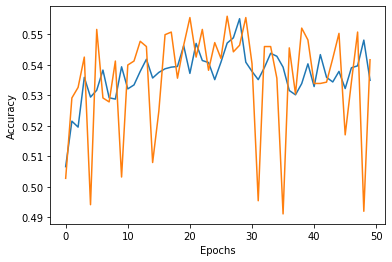

In [442]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [443]:
unique = x_prediction.values
results = []
superieur2 =[]
inferieur2 = []
i = 0
predictions_final = model_deux_cinq.predict(np.array([x_train[1]]))
predictions_final.shape

(1, 2)

In [444]:
model_deux_cinq.load_weights("model_buts_2,5.h5")

In [ ]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieur2.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieur2.append(pred1)

    print(result,predictions_final)

0 [[9.9990976e-01 9.0178597e-05]]
0 [[0.9971329  0.00286705]]
1 [[0.00628496 0.9937151 ]]
0 [[1.0000000e+00 3.1403687e-08]]
0 [[0.99795204 0.002048  ]]
0 [[1.0000000e+00 1.0464887e-08]]
0 [[9.9984860e-01 1.5143101e-04]]
1 [[0.01536193 0.98463804]]
1 [[0.10993606 0.89006394]]
0 [[1.000000e+00 2.378662e-13]]
0 [[9.9999905e-01 9.4939833e-07]]
1 [[0.4515516  0.54844844]]
0 [[1.0000000e+00 1.9409449e-20]]
0 [[0.6809188 0.3190812]]
0 [[1.0000000e+00 3.1769034e-22]]
0 [[9.999989e-01 1.116815e-06]]
0 [[9.9903715e-01 9.6282695e-04]]
0 [[0.5792789  0.42072117]]
1 [[0.14987226 0.8501277 ]]
0 [[9.9968565e-01 3.1437981e-04]]
1 [[0.02406002 0.97594   ]]
0 [[1.0000000e+00 1.2349573e-23]]
1 [[1.4247827e-07 9.9999988e-01]]
0 [[9.9996316e-01 3.6841986e-05]]
0 [[9.9999964e-01 3.7196870e-07]]
0 [[9.9975532e-01 2.4463295e-04]]
0 [[9.999355e-01 6.452806e-05]]
0 [[9.9968183e-01 3.1816179e-04]]
0 [[1.00000e+00 4.16674e-18]]
0 [[9.9998975e-01 1.0256615e-05]]
0 [[1.000000e+00 2.878391e-12]]
0 [[1.000000e+00 3.7

In [ ]:
superieur2 = np.round(superieur2,2)
inferieur2 = np.round(inferieur2,2)

In [ ]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'probabilité_inf_2,5 buts':inferieur2,'probabilité_sup_2,5 buts':superieur2}
df = pd.DataFrame(df)
df

In [ ]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_2,5.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_modele_2,5.json')

In [ ]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'superieur_a_1,5_buts':superieurun,'superieur_a_2,5_buts':superieur2}
df = pd.DataFrame(df)
df

In [ ]:
# df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
#       'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'< 0,5 buts':zero,'< 1,5 buts':un,'< 2,5 buts':deux}
# df = pd.DataFrame(df)
# df

In [ ]:
# df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.csv',index = False)
# df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.json')

In [ ]:
finished = []
scheduled = []

In [ ]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [ ]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","superieur_a_1,5_buts","superieur_a_2,5_buts"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)
df_fini = df_fini.sort_values(by = 'date',ascending= False)
df_programme= df_programme.sort_values(by = 'date',ascending= True)

In [ ]:
df_fini

In [ ]:
df_programme

In [ ]:
df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.csv',index=False)
df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.json')

In [ ]:
df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.csv',index=False)
df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.json')